# Diversifying Parameters in Reinforcement Learning (Distributional RL)
Package designed to simulate the expected shape of an agent using a distributional TD-$\lambda$ learning scheme, an algorithm thought to be encoded by dopamine neurons in the striatum (when learning). The following functionality is included to model experiments and agents:
- Task contigencies (number and timing of cues, reward sizes and delays, etc.)
- Diversity of parameters in TD error computation ($\alpha$, $\gamma$, $\lambda$)
- Associated visualizations (learning/value at time of cue over trials, animations, etc.)
- Saving simulation data/visualizations through function parameters
<br><br>

Change the objects/functions as needed, particularly in the `drl.py` file! See examples, below. 

In [99]:
import drl
import torch
import importlib

importlib.reload(drl)
torch.manual_seed(0)

<h1>Trial Parameters</h1>

In [23]:
n_trials = 50 # number of trials
t_int = 7 # length of trial
dt = 0.1 # timestep size
tsk = "hyp_unif" # to specify reward schedules

types = 1 # types of trials
t_stim = torch.full((types,), 2) # time of stimulus
t_rew = torch.full((types,), 6) # time of reward
s_rew = torch.full((types,), 1)
n_predictors = 20  # number of value predictors
 
# Advanced Parameters
unc = 0 #uncertainty factor

In [93]:
n_trials = 50 # number of trials
t_int = 7 # length of trial
dt = 0.1 # timestep size
tsk = "var" # to specify reward schedules

types = 1 # types of trials
t_stim = torch.full((types,), 2) # time of stimulus
t_rew = torch.full((types,), 6) # time of reward
s_rew = torch.tensor([[0.1, 0.06612594], [0.3, 0.09090909], [1.2, 0.14847358], [2.5, 0.15489467], [5, 0.31159175], [10, 0.150519], [20, 0.07705306]])
n_predictors = 25  # number of value predictors
 
# Advanced Parameters
unc = 0 #uncertainty factor

In [60]:
n_trials = 200
t_int = 8 # length of trial
dt = 0.5 # timestep size
tsk = "delay"

types = 6
t_stim = torch.full((types,), 1)
t_rew = torch.tensor([2.25, 3.5, 5, 7.5, 2, 2])
s_rew = torch.tensor([3, 3, 3, 3, 0.5, (1/6)])
n_predictors = 20 # number of value predictors

# Advanced Parameters
unc = 0

<h1>Simulations</h1>

In [94]:
#init
T, x, r = drl.init(tsk = tsk,
                   n_trials = n_trials, 
                   t_int = t_int, 
                   delta = dt, 
                   types = types,
                   t_stim = t_stim,
                   t_rew = t_rew,
                   s_rew = s_rew,
                   uncertainty = unc)

#simulate given parameters
exp = drl.sim(T, x, r, 
                tsk = tsk,
                num_predictors = n_predictors,
                l = 0.2, 
                g = (0.3,0.8), 
                a = [0.2, 0.4, 0.6])


[0.2, 0.4, 0.6]


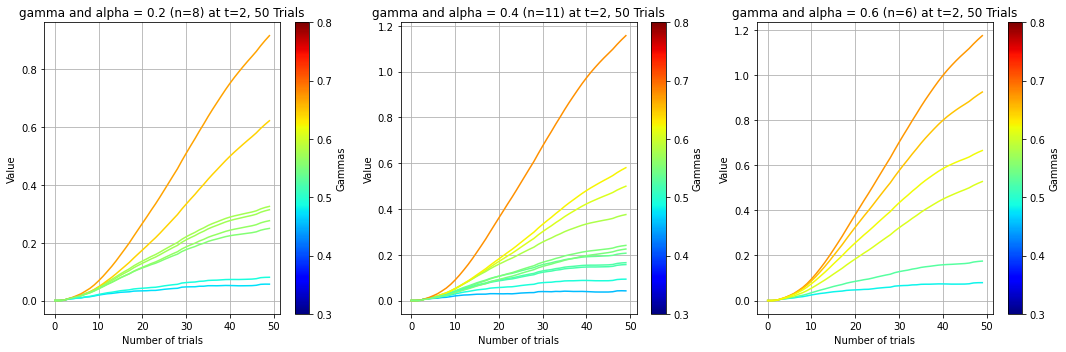

<Figure size 432x288 with 0 Axes>

In [102]:
drl.val_at_t(exp, dt = dt, state = 0, 
             time = 2, 
             diversify = ["gamma", (0.3,0.8), "alpha", [0.2, 0.4, 0.6]])

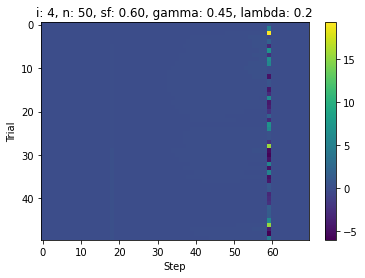

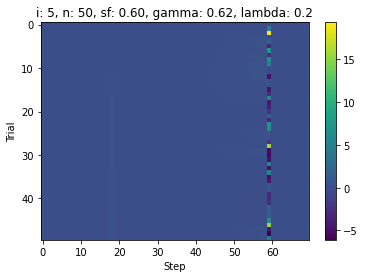

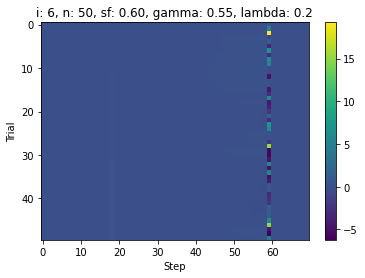

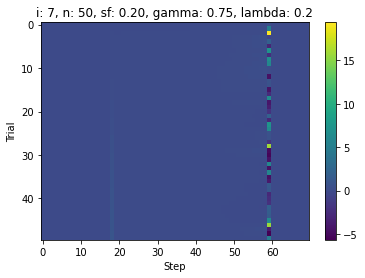

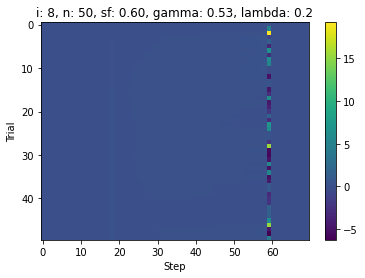

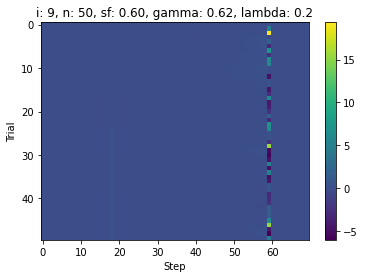

<Figure size 432x288 with 0 Axes>

In [97]:
drl.heatmap(exp, state = 0, 
            prs = range(4,10), 
            diversify=["gamma", "alpha"])

In [103]:
drl.val_over_t(exp, st = 0, dt = 0.5,
                    fname = ["blah"],
                    diversify = ["gamma", (0.3,0.8), "alpha", [0.2, 0.4, 0.6]],
                    trials=[5,15])

In [100]:
exp = drl.sim(T, x, r, 
                tsk = tsk,
                num_predictors = n_predictors,
                l = 0.2, 
                g = (0.3,0.8), 
                a = [0.2, 0.4, 0.6],
                fname = ["var"])

In [101]:
exp = torch.load("var.pth")